In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("/kaggle/input/contextaware/emonoba_train.csv")
df_val = pd.read_csv("/kaggle/input/contextaware/emonoba_val.csv")

In [3]:
df_train.head()

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,5454,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0,Travel,Youtube,False
1,22549,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...,0,0,0,0,1,0,Politics,Youtube,False
2,7033,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...,0,0,0,1,0,0,Personal,Facebook,False
3,21114,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,0,0,0,0,1,0,Education,Facebook,False
4,23683,সত্যিকার মানুষ তারাই ভাই,0,1,0,0,0,0,Personal,Youtube,False


In [4]:
# Function to get the emotion with value 1 or NaN if all values are 0
def get_emotion(row):
    emotions = ['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']
    nonzero_emotions = [emotion for emotion in emotions if row[emotion] == 1]
    return nonzero_emotions[0] if nonzero_emotions else np.nan

# Create a new column 'Emotion' based on the custom function
df_train['Label'] = df_train.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_train = df_train[['Data', 'Label']]

In [5]:
# Create a new column 'Emotion' based on the custom function
df_val['Label'] = df_val.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_val = df_val[['Data', 'Label']]

In [6]:
df_train

,Data,Label
0,লকাল বাস ভালো এটা থেকে,Sadness
1,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...,Sadness
2,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...,Anger
3,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,Sadness
4,সত্যিকার মানুষ তারাই ভাই,Joy
...,...,...
18415,সমস্যা নাই ইনশাআল্লাহ আমরা একদিন ক্রিকেট কে শা...,Joy
18416,খানকিরপুলা তর মাকে গিয়ে বল দেহো দিলা মনটা দিলা...,Sadness
18417,ভাই চেয়ার কই🙄,Surprise
18418,সবকয়টা তো একই গোয়ালের গাই,Sadness


In [7]:
df_val

,Data,Label
0,চট্রগ্রাম এবং কক্সবাজার বন্যা কবলিত এলাকাতে ত্...,Joy
1,আমার কাছে ছিল শুধু রিহানের ফটো এলবাম। বছর দুয়ে...,Anger
2,হারিয়ে দেখিয়ে দিলো মাদ্রাসা ছাত্র,Joy
3,তোরা বালছিড়বি কাঙলাচোদার দল।🤣🤣🤣ছোটলোক ভিখারিচ...,Sadness
4,বিপ্লবী সাহসী মেয়ে ...,Joy
...,...,...
2042,অনেক অনেক ভাল লাগলো,Joy
2043,একটু সাউন্ড এর সমস্যা,Anger
2044,খেলা হব্বে 💕,Joy
2045,মুখে আর বয়ান শুনতে চায় না এর বিচার ফাঁসি চায়,Sadness


In [8]:
df_train.dropna(inplace=True)

In [9]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

1249


In [10]:
df_train['Label'].value_counts()

Label
Joy         6478
Sadness     3975
Love        3786
Anger       3295
Surprise     724
Fear         162
Name: count, dtype: int64

In [11]:
df_val['Label'].value_counts()

Label
Joy         743
Sadness     429
Love        414
Anger       362
Surprise     79
Fear         20
Name: count, dtype: int64

In [12]:
df_train['Data']

0                                  লকাল বাস ভালো এটা থেকে 
1        কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...
2        বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...
3                        চাচাজি তো কেবল মাকে ধর্ষণ করেছেন 
4                                সত্যিকার মানুষ তারাই ভাই 
                               ...                        
18415    সমস্যা নাই ইনশাআল্লাহ আমরা একদিন ক্রিকেট কে শা...
18416    খানকিরপুলা তর মাকে গিয়ে বল দেহো দিলা মনটা দিলা...
18417                                       ভাই চেয়ার কই🙄 
18418                           সবকয়টা তো একই গোয়ালের গাই 
18419    বসন্তের ফুলেল উপহার তো পেলাম না' রওশন: আছে আছে...
Name: Data, Length: 18420, dtype: object

In [13]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

1249


In [14]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [15]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [16]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.6 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=0552771c562ff913dddc6a9b797f7f8162b3176e2f4f3272c64a11d201420e31
  Stored in directory: /roo

In [17]:
import ktrain
from ktrain import text
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [18]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 10
	95percentile : 26
	99percentile : 46


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 11
	95percentile : 27
	99percentile : 51


In [19]:
print(trn)

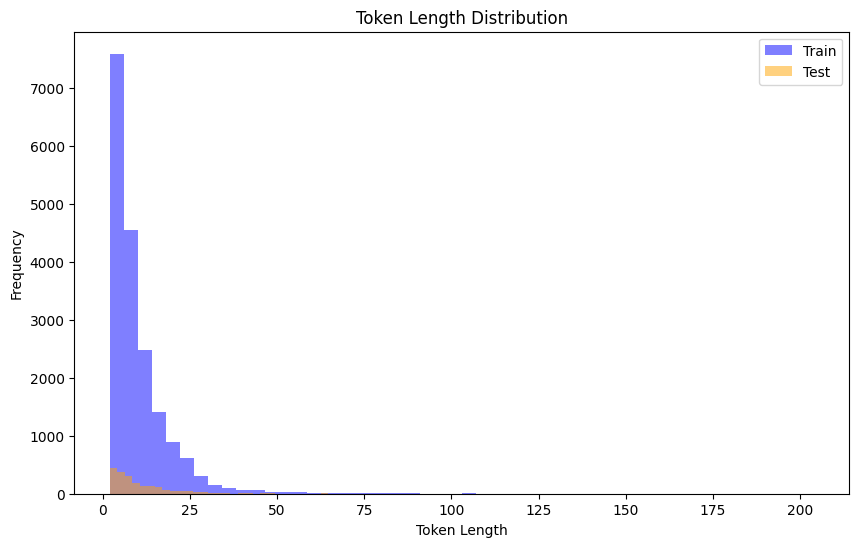

In [20]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [21]:
model = t.get_classifier()

In [22]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [23]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [24]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
2303/2303 [==============================] - 1425s 607ms/step - loss: 1.2689 - accuracy: 0.4924 - val_loss: 0.9394 - val_accuracy: 0.6351
Epoch 2/10
2303/2303 [==============================] - 1393s 605ms/step - loss: 0.9520 - accuracy: 0.6309 - val_loss: 0.8559 - val_accuracy: 0.6624
Epoch 3/10
2303/2303 [==============================] - 1393s 605ms/step - loss: 0.8439 - accuracy: 0.6707 - val_loss: 0.8655 - val_accuracy: 0.6566
Epoch 4/10
2303/2303 [==============================] - 1393s 605ms/step - loss: 0.7569 - accuracy: 0.7087 - val_loss: 0.8420 - val_accuracy: 0.6659
Epoch 5/10
2303/2303 [==============================] - 1393s 605ms/step - loss: 0.6782 - accuracy: 0.7341 - val_loss: 0.8312 - val_accuracy: 0.6717
Epoch 6/10
2303/2303 [==============================] - 1394s 605ms/step - loss: 0.5897 - accuracy: 0.7682 - val_loss: 1.5610 - val_accuracy: 0.3459
Epoch 7/10
2303/2303 [=====================

In [25]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [26]:
classes=t.get_classes()

In [27]:
cm = learner.validate(class_names=t.get_classes())

64/64 [==============================] - 22s 294ms/step
              precision    recall  f1-score   support

       Anger       0.68      0.65      0.66       362
        Fear       0.28      0.25      0.26        20
         Joy       0.72      0.71      0.72       743
        Love       0.60      0.60      0.60       414
     Sadness       0.75      0.79      0.77       429
    Surprise       0.41      0.39      0.40        79

    accuracy                           0.68      2047
   macro avg       0.57      0.57      0.57      2047
weighted avg       0.68      0.68      0.68      2047



In [28]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [29]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)
